In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('user-ct-test-collection-02.txt', sep='\t')

In [ ]:
data.head()

In [ ]:
data['ClickURL'] = data['ClickURL'].str.strip(r'http://www.')
# data = data[pd.notnull(data['ClickURL'])]

In [5]:
data.head()

,AnonID,Query,QueryTime,ItemRank,ClickURL
0,479,family guy,2006-03-01 16:01:20,NaN,NaN
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN
2,479,family guy movie references,2006-03-03 22:37:46,1.0,familyguyfiles.com
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.0,movieweb.com
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.0,imdb.com


In [ ]:
import datetime as dt

In [ ]:
data['QueryTime']= pd.to_datetime(data['QueryTime']) 

In [ ]:
#### Statics Summary of Data

In [6]:
total_len = len(data)
unique_query = data["Query"].nunique()
unique_users = data["AnonID"].nunique()
unique_urls = data["ClickURL"].nunique()

In [7]:
print("Total Number of Data/Query : ", total_len)
print("Total Unique Users : ", unique_users)
print("Total Unique Query : ", unique_query)
print("Total Unique URLs : ", unique_urls)

Total Number of Data/Query :  3614506
Total Unique Users :  66000
Total Unique Query :  1244495
Total Unique URLs :  382210


In [8]:
def timeOfDay(date):
    #dt = parse(date)
    if date.hour < 12:
        return "Morning"
    if date.hour>= 12 and date.hour <= 15:
        return "Afternoon"
    if date.hour> 15 and date.hour < 21:
        return "Evening"
    else:
        return "Night"

In [9]:
timedf = data[["AnonID", "Query", "ItemRank", "QueryTime"]]
timedf.head()
timedf['QueryDate'] = pd.to_datetime(timedf['QueryTime']).apply(lambda x: x.date())
timedf['QueryTimeStamp'] = pd.to_datetime(timedf['QueryTime']).apply(lambda x: x.time())
timedf['TOD'] = timedf['QueryTimeStamp'].apply(lambda x: timeOfDay(x))

In [10]:
timedf.head()

,AnonID,Query,ItemRank,QueryTime,QueryDate,QueryTimeStamp,TOD
0,479,family guy,NaN,2006-03-01 16:01:20,2006-03-01,16:01:20,Evening
1,479,also sprach zarathustra,NaN,2006-03-02 14:48:55,2006-03-02,14:48:55,Afternoon
2,479,family guy movie references,1.0,2006-03-03 22:37:46,2006-03-03,22:37:46,Night
3,479,top grossing movies of all time,1.0,2006-03-03 22:42:42,2006-03-03,22:42:42,Night
4,479,top grossing movies of all time,2.0,2006-03-03 22:42:42,2006-03-03,22:42:42,Night


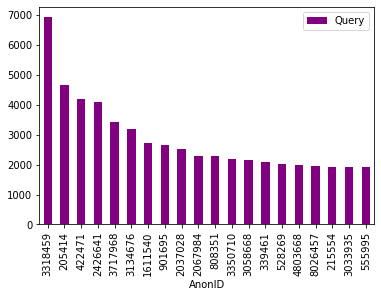

In [19]:
commonusers = data.groupby(['AnonID'])['Query'].count().to_frame()
commonusers= commonusers.sort_values(by='Query', ascending=False)
commonusers.head(20).plot(kind='bar', color='purple')
plt.savefig('CommonUsers.png')

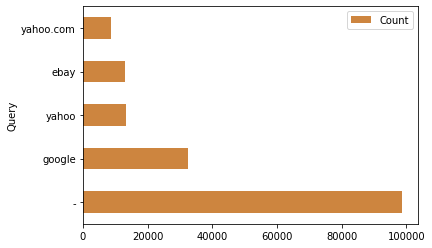

In [13]:
queries = data.Query
faq = pd.DataFrame({'Query': queries.value_counts().index, 'Count':queries.value_counts()})
faq.index = range(faq.shape[0])
f = faq.head()
f.index = f.Query
f = f[['Count']]
f.plot(kind = 'barh', color = "peru")
plt.savefig('MostSearchedQueries.png')

In [14]:
# data['ClickURL'] = data['ClickURL']
frequrl = data.groupby(['ClickURL'])['ClickURL'].count().to_frame()
frequrl['DomainName'] = list(frequrl.index)
frequrl['Count'] = frequrl['ClickURL']
frequrl= frequrl[['DomainName', 'Count']]
frequrl= frequrl.sort_values(by='Count', ascending=False)
frequrl = frequrl.reset_index(drop=True)
frequrl.head(10)

,DomainName,Count
0,google.com,36109
1,yahoo.com,16275
2,myspace.com,16063
3,en.wikipedia.org,12275
4,amazon.com,11039
5,imdb.com,9792
6,mapquest.com,9462
7,ebay.com,7613
8,mail.yahoo.com,4814
9,bankofamerica.com,4509


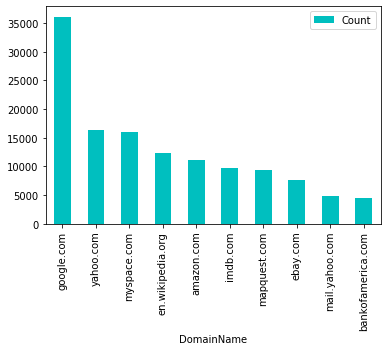

In [15]:
frequrl.index = frequrl.DomainName
frequrl.head(10).plot(kind='bar', color='coralblue')
plt.savefig('CommonURLS.png')

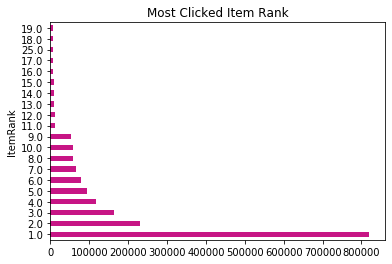

In [16]:
rankFreq = pd.DataFrame(data.groupby(['ItemRank'])['Query'].count())
rankFreq = rankFreq.sort_values(by='Query', ascending=False).head(20)
rankFreq.plot(kind = 'barh', color='mediumvioletred', legend=False)
plt.title('Most Clicked Item Rank')
plt.savefig('HighestRankFreq')

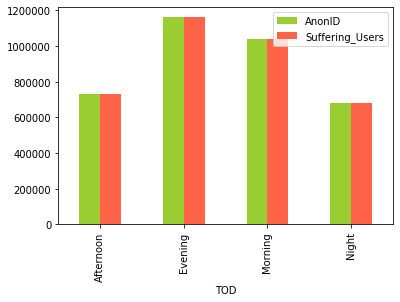

In [11]:
sufferingUsers = timedf.groupby(['TOD'])['AnonID'].count().to_frame()
timing = timedf.groupby(['TOD'])['AnonID'].count().to_frame()
timing['Suffering_Users'] = sufferingUsers.AnonID
timing.plot(kind='bar', color=['yellowgreen','tomato'])
plt.savefig("SufferingUsers")

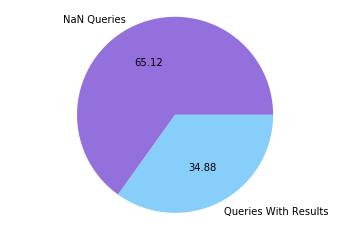

In [17]:
cleandata = data.dropna()
plt.figure()
values1 = [data.shape[0]/data.shape[0],cleandata.shape[0]/data.shape[0]] 
labels1 = ['NaN Queries', 'Queries With Results'] 
colors1 = ['mediumpurple','lightskyblue'] 
plt.pie(values1, labels=labels1, autopct='%.2f', colors=colors1)
plt.axis('equal')
plt.savefig('NaNQueries.png')
plt.show()